# Exploratory Data Analysis

## Haberman Dataset

Data Description: The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
                                  
Number of Instances: 306

Number of Attributes: 4 (including the class attribute)

Attribute Information:

Age of patient at time of operation (numerical)

Patient's year of operation (year - 1900, numerical)

Number of positive axillary nodes detected (numerical)

Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

Missing Attribute Values: None                            
                                  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
#load haberman.csv into a pandas dataframe
hb=pd.read_csv("C:/Users/Administrator/Documents/Datasets/haberman.csv")

In [2]:
#How many datapoints and features does this dataset have..
print(hb.shape)

(306, 4)


In [3]:
#To know the column names in the dataset
print(hb.columns)

Index(['age', 'year_operation', 'aux_nodes', 'status'], dtype='object')


In [4]:
hb["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

In [5]:
hb['status']=["Survived_long"  if hb['status'][i] == 1 else "Survived_short" for i in range(306)]

In [6]:
hb["status"].value_counts()

Survived_long     225
Survived_short     81
Name: status, dtype: int64

In [7]:
#To know about the dataset...
print(hb.describe())

              age  year_operation   aux_nodes
count  306.000000      306.000000  306.000000
mean    52.457516       62.852941    4.026144
std     10.803452        3.249405    7.189654
min     30.000000       58.000000    0.000000
25%     44.000000       60.000000    0.000000
50%     52.000000       63.000000    1.000000
75%     60.750000       65.750000    4.000000
max     83.000000       69.000000   52.000000


Observation:
1. Total number of datapoints present in dataset is 306.
2. The minimum auxilary nodes detected was 0 and the max was 52

### 2-D Scatter plot with color-coding.

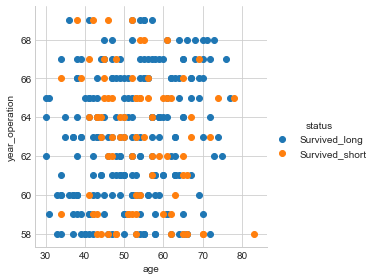

In [9]:
sns.set_style("whitegrid");
sns.FacetGrid(hb, hue="status", size=4) \
   .map(plt.scatter, "age", "year_operation") \
   .add_legend();
plt.show();

Observation:
1. From the above plots we cannot come to any kind of conclusions.

### Pair plots

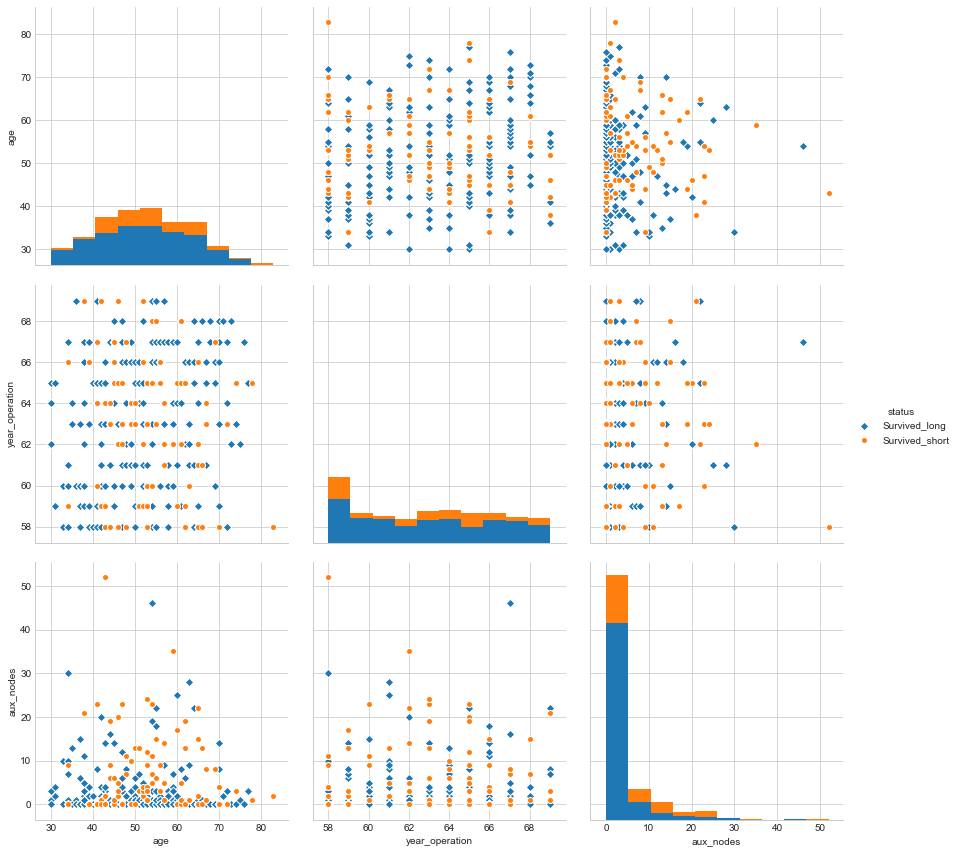

In [10]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(hb, hue="status", markers=["D", "o"], size=4,vars=['age', 'year_operation', 'aux_nodes']);
plt.show()

Observation:
1. From age - aux_nodes relation-> There are more patients having auxilary nodes 0 survived.

### 1-D scatter plot

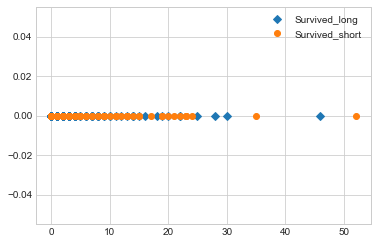

In [33]:
# 1-D scatter plot using just one feature?
# x-axis -> aux_nodes and no y-axis.

import numpy as np
survived = hb[hb["status"] == "Survived_long"];
died = hb.loc[hb["status"] == "Survived_short"];



plt.plot(survived["aux_nodes"], np.zeros_like(survived['aux_nodes']), 'D')
plt.plot(died["aux_nodes"], np.zeros_like(died['aux_nodes']), 'o')
plt.gca().legend(('Survived_long','Survived_short'))


plt.show()
#print(died)

Observation:
1. overlapping a lot, cannot make any conclusions.

## Univariate Analysis

### Histograms, PDF, CDF

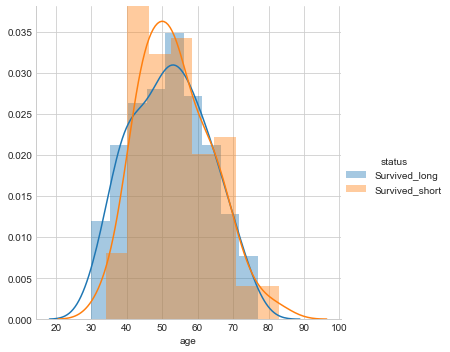

In [20]:
sns.FacetGrid(hb, hue="status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

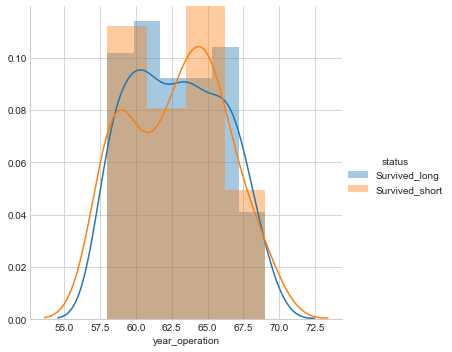

In [21]:
sns.FacetGrid(hb, hue="status", size=5) \
   .map(sns.distplot, "year_operation") \
   .add_legend();
plt.show();

More number of patients died within 5 years whose year of operation was in between 1963 and 1966.

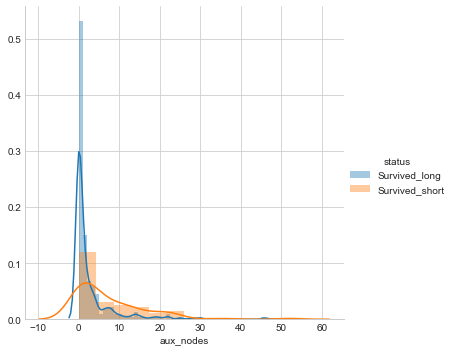

In [22]:
sns.FacetGrid(hb, hue="status", size=5) \
   .map(sns.distplot, "aux_nodes") \
   .add_legend();
plt.show();

Observations:
1. There is more dense in the region where auxilary nodes=0 =>There are more number of patients having auxilary nodes 0.
2. Patients with auxilary nodes<4 has more chance of survival.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


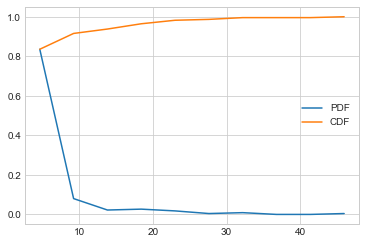

In [34]:
counts, bin_edges = np.histogram(survived['aux_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.gca().legend(('PDF','CDF'))

plt.show();

83% of the patients survived longer who have auxilary nodes <= 4

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


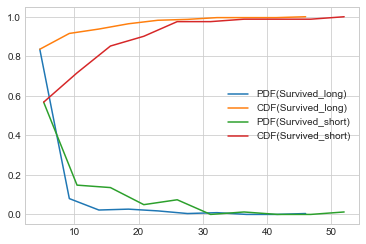

In [55]:
counts, bin_edges = np.histogram(survived['aux_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(died['aux_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.gca().legend(('PDF(Survived_long)','CDF(Survived_long)','PDF(Survived_short)','CDF(Survived_short)'))

plt.show();

plt.show();

### Mean, Variance, Std-deviation,

In [25]:
print("Means:")
print(np.mean(survived["aux_nodes"]))
print(np.mean(died["aux_nodes"]))

print("\nStd-dev:");
print(np.std(survived["aux_nodes"]))
print(np.std(died["aux_nodes"]))


Means:
2.7911111111111113
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632


### Median, Quantiles, Percentiles, IQR.

In [26]:

print("\nMedians:")
print(np.median(survived["aux_nodes"]))
print(np.median(died["aux_nodes"]))


print("\nQuantiles:")
print(np.percentile(survived["aux_nodes"],np.arange(0, 100, 25)))
print(np.percentile(died["aux_nodes"],np.arange(0, 100, 25)))

print("\nQuantiles:Age")
print(np.percentile(survived["age"],np.arange(0, 100, 25)))
print(np.percentile(died["age"],np.arange(0, 100, 25)))

print("\nQuantiles:year_operation")
print(np.percentile(survived["year_operation"],np.arange(0, 100, 25)))
print(np.percentile(died["year_operation"],np.arange(0, 100, 25)))


print("\n80th Percentiles:")
print(np.percentile(survived["aux_nodes"],80))
print(np.percentile(died["aux_nodes"],80))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(survived["aux_nodes"]))
print(robust.mad(died["aux_nodes"]))


Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

Quantiles:Age
[30. 43. 52. 60.]
[34. 46. 53. 61.]

Quantiles:year_operation
[58. 60. 63. 66.]
[58. 59. 63. 65.]

80th Percentiles:
4.0
13.0

Median Absolute Deviation
0.0
5.930408874022408


Observation:
1. From Quantiles-> 75% of the patients having auxilary nodes <=3 survived
2. 25% of the patients having auxilary nodes<=1 died.

### Boxplot

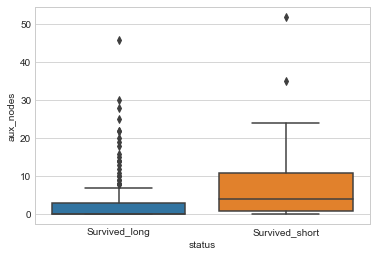

In [27]:
sns.boxplot(x='status',y='aux_nodes', data=hb)
plt.show()

### Violin plot

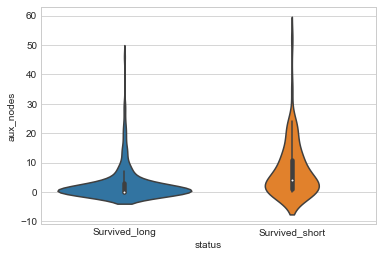

In [28]:
sns.violinplot(x="status", y="aux_nodes", data=hb, size=8)
plt.show()

### Contour Plots

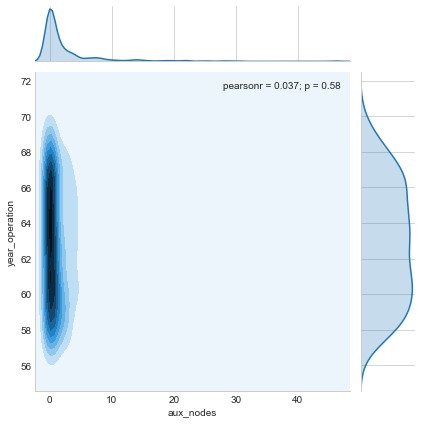

In [29]:
sns.jointplot(x="aux_nodes", y="year_operation", data=survived, kind="kde");
plt.show();

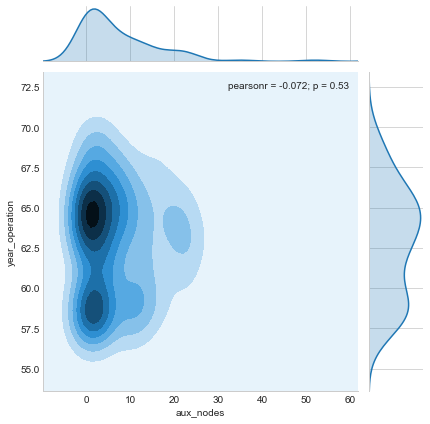

In [30]:
sns.jointplot(x="aux_nodes", y="year_operation", data=died, kind="kde");
plt.show();

Conclusions:
1. Among the 4 features, Auxilary nodes plays a prominant role in deciding whether a patient will survive or not.
2. Patients having auxilary nodes <=3 survived longer.
3. More number of patients died within 5 years whose year of operation was in between 1963 and 1966